In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
import numpy as np

# Load the dataset
data_train = fetch_20newsgroups(subset='train')
data_test = fetch_20newsgroups(subset='test')

categories = data_train.target_names

# Training - Calculating word probabilities for each category
category_word_probs = {}
category_counts = {}

#category_word_probs = {category:{}, ...}
#category_counts = {category:0, ...}
for category in categories:
    category_word_probs[category] = {}
    category_counts[category] = 0

for i in range(len(data_train.data)):
    category = data_train.target_names[data_train.target[i]]
    words = data_train.data[i].lower().split()

    for word in words:
        if word not in category_word_probs[category]:
            category_word_probs[category][word] = 0
        category_word_probs[category][word] += 1
        category_counts[category] += 1

# Testing - Classifying test data based on word probabilities
predictions = []
for i in range(len(data_test.data)):
    words = data_test.data[i].lower().split()

    #reset max_prob, predicted_category
    max_prob = -1
    predicted_category = None

    for category in categories:
        prob = 0
        for word in words:
            if word in category_word_probs[category]:
                # Laplace smoothing
                prob += np.log((category_word_probs[category][word] + 1) / (category_counts[category] + len(category_word_probs[category])))
            else:
                prob += np.log(1 / (category_counts[category] + len(category_word_probs[category])))

        # When the prob > previous maximum prob or 
        # When the maximum prob is the initial,
        # update the maximum prob and update predicted_category 
        if prob > max_prob or max_prob == -1:
            max_prob = prob
            predicted_category = category

    predictions.append(data_train.target_names.index(predicted_category))

# Calculate accuracy by comparing
accuracy = accuracy_score(data_test.target, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 74.38%


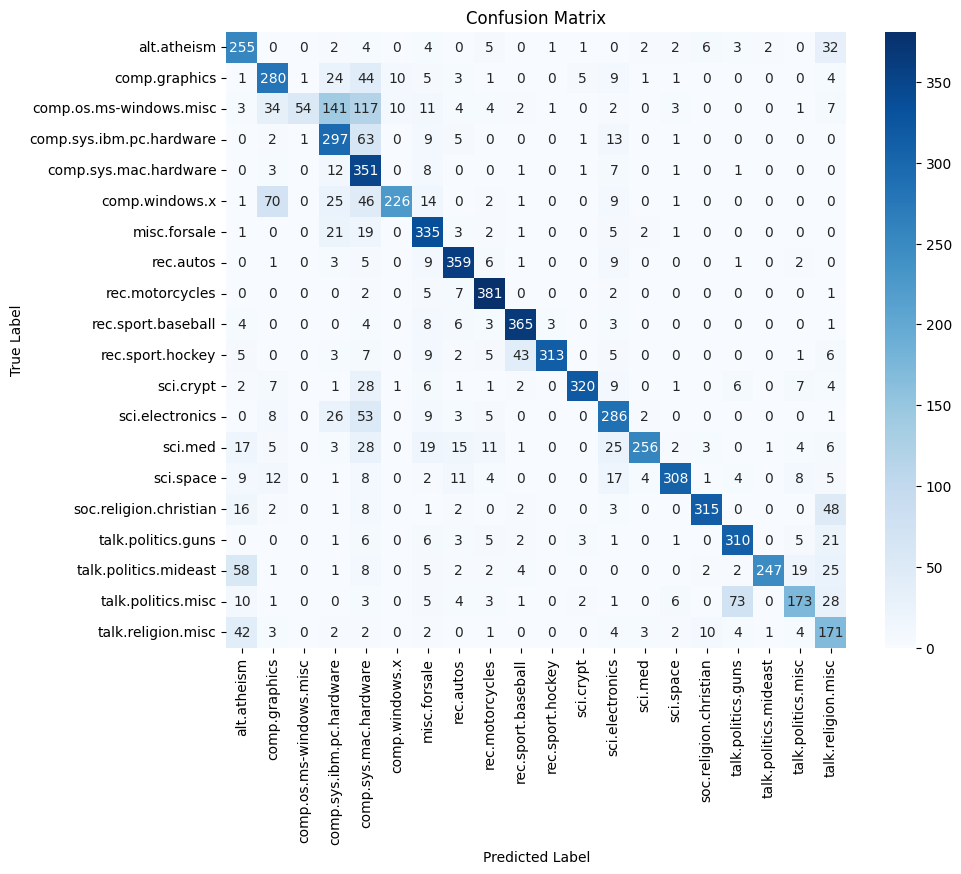

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(data_test.target, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data_test.target_names, yticklabels=data_test.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()